In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
from src.utils import (
    preprocess_match_data,
    plot_avg_goals_by_league,
    plot_stacked_percentage_cards,
    plot_games_count_by_league,
    plot_avg_cards_per_game,
    plot_stacked_cards,
    create_champions_dataframe,
    calculate_champions_by_country,
    plot_champions_count_by_country,
    plot_avg_cards_by_matchup,
    get_color_mapping,
    plot_avg_corners_by_league,
    plot_avg_corners_by_country,
    plot_avg_corners_by_matchup,
    plot_avg_corners_by_team,
    plot_games_with_most_cards,
    plot_avg_goals_per_round,
    plot_avg_goals_per_round_and_league,
    plot_avg_cards_per_round_and_league,
    plot_avg_corners_per_round_and_league,
    plot_cards_per_round,
    plot_card_percentages_per_round
)

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/fixtures.csv")
df = preprocess_match_data(df=df)
df.sample(3)

,fixture_id,league_id,season,round,home_team,away_team,goals_home,goals_away,yellow_cards_home,yellow_cards_away,red_cards_home,red_cards_away,corner_kicks_home,corner_kicks_away,total_yellow_cards,total_red_cards,total_corner_kicks,league_name,home_country,away_country
243,1187174,11,2024,Fase de Grupos,Delfin SC,Real Tomayapo,4.0,3.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,10,Libertadores,Equador,Bolívia
92,1187247,13,2024,Fase de Grupos,Colo Colo,Fluminense,0.0,1.0,2.0,6.0,0.0,0.0,4,2,8.0,0.0,6,Sulamericana,Chile,Brasil
252,1187183,11,2024,Fase de Grupos,Cruzeiro,Universidad Catolica,1.0,0.0,0.0,1.0,0.0,0.0,9,4,1.0,0.0,13,Libertadores,Brasil,Chile


### Gols

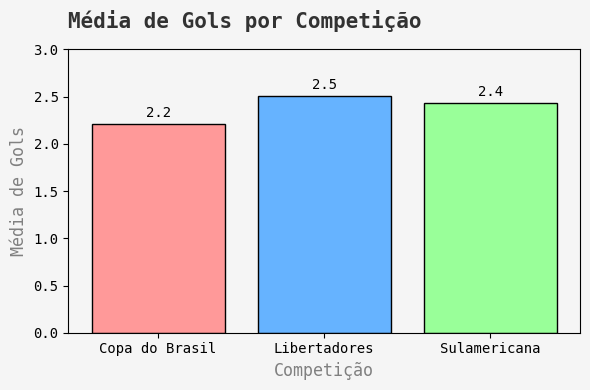

In [4]:
color_mapping = get_color_mapping(df=df)
plot_avg_goals_by_league(
    df=df, title="Média de Gols por Competição", color_mapping=color_mapping
)

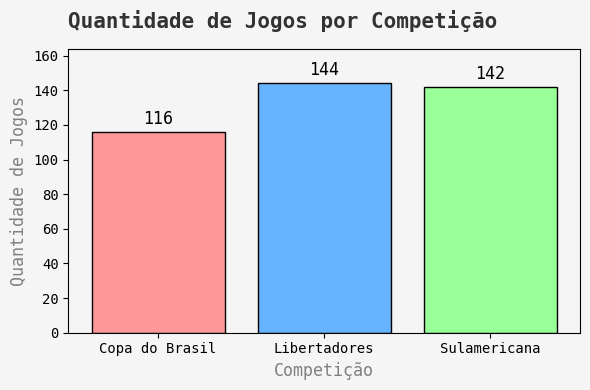

In [5]:
plot_games_count_by_league(
    df=df, title="Quantidade de Jogos por Competição", color_mapping=color_mapping
)

### Cartões

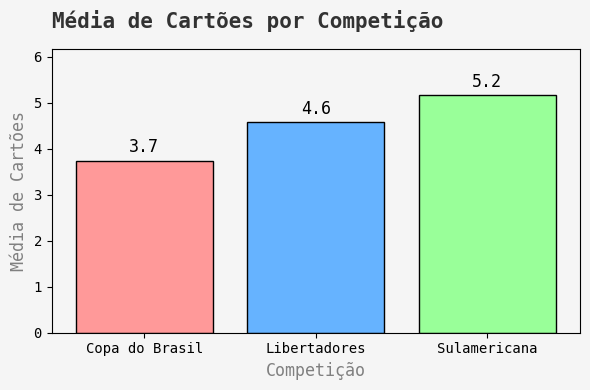

In [6]:
plot_avg_cards_per_game(
    df=df, title="Média de Cartões por Competição", color_mapping=color_mapping
)

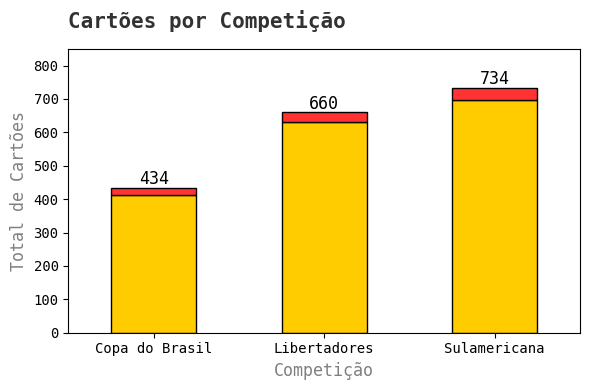

In [7]:
plot_stacked_cards(df=df)

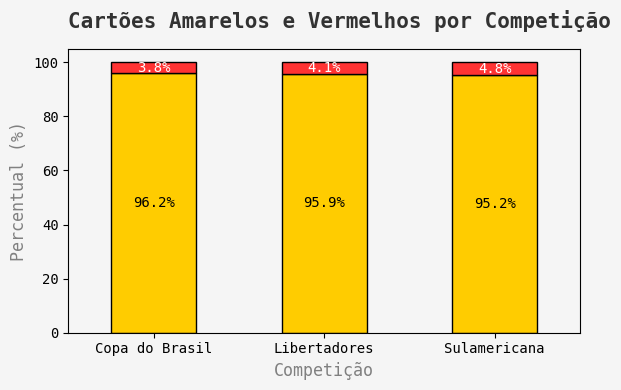

In [8]:
plot_stacked_percentage_cards(df=df)

<div class="alert alert-block alert-info">
<b>Insight:</b> A Sulamericana é o campeonato com mais cartões em todas as estatísticas: maior média (5,2), maior quantidade (734) e maior percentual de cartões vermelhos, dentre os cartões distribuídos (4,8%).</div>

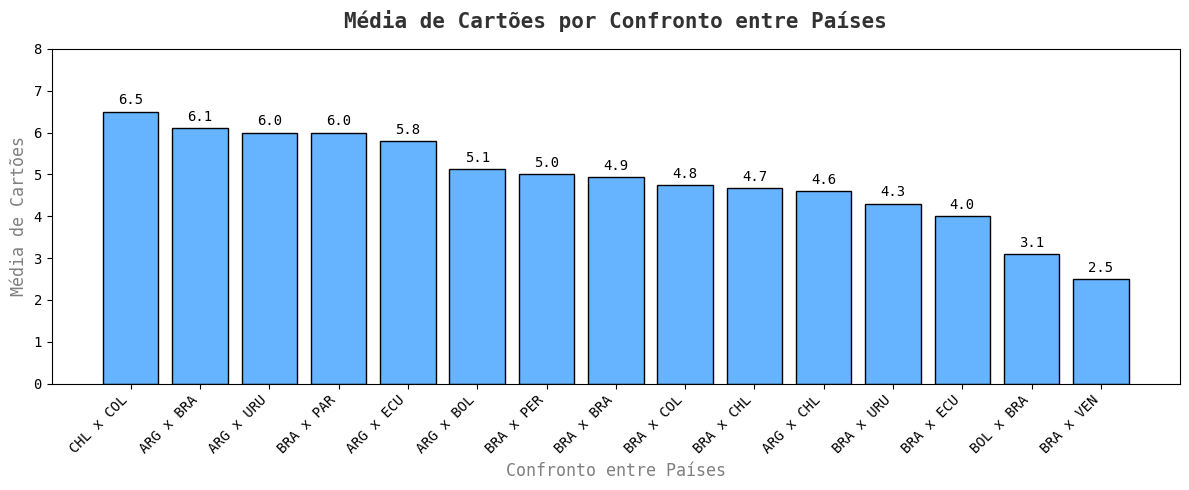

In [9]:
plot_avg_cards_by_matchup(df=df)

<div class="alert alert-block alert-info">
<b>Insight:</b> Confrontos entre times chilenos e colombianos podem ser considerados os mais "violentos", com média de 6,5 cartões por jogo. Destaque para a argentina, que considerando os seis confrontos com mais cartões entregues, está em quatro: contra brasileiros (top 2), uruguaios, ecuatorianos e bolivianos.</div>

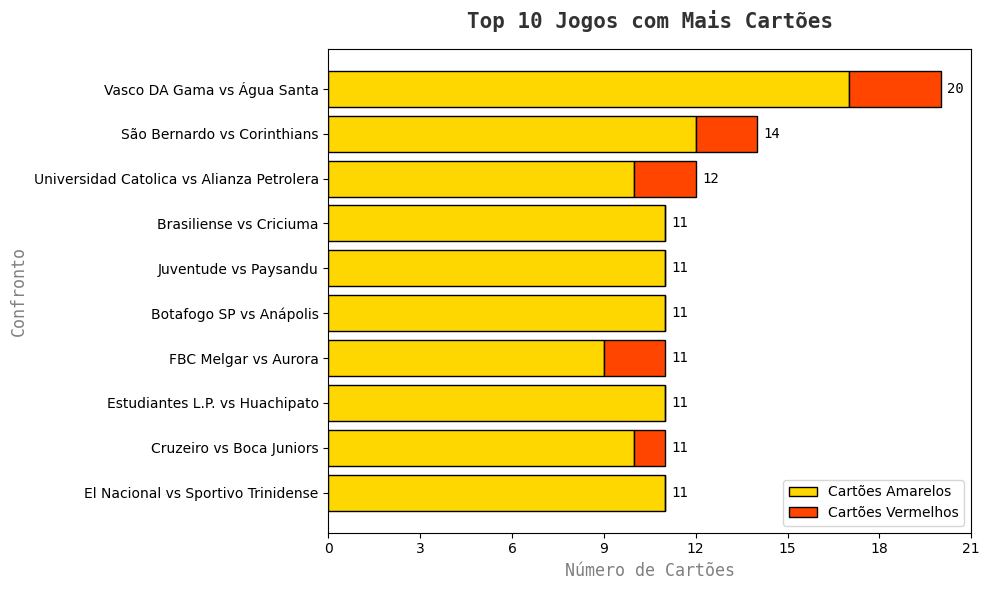

In [10]:
plot_games_with_most_cards(df=df, top_n=10)

### Escanteios

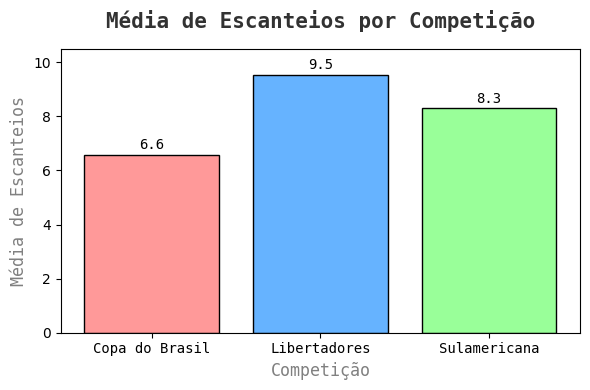

In [11]:
plot_avg_corners_by_league(df=df, color_mapping=color_mapping)

<div class="alert alert-block alert-info">
<b>Insight:</b> A média de escanteios na Libertadores é bem acima dos outros dois campeonatos, quase 10 por jogo.</div>

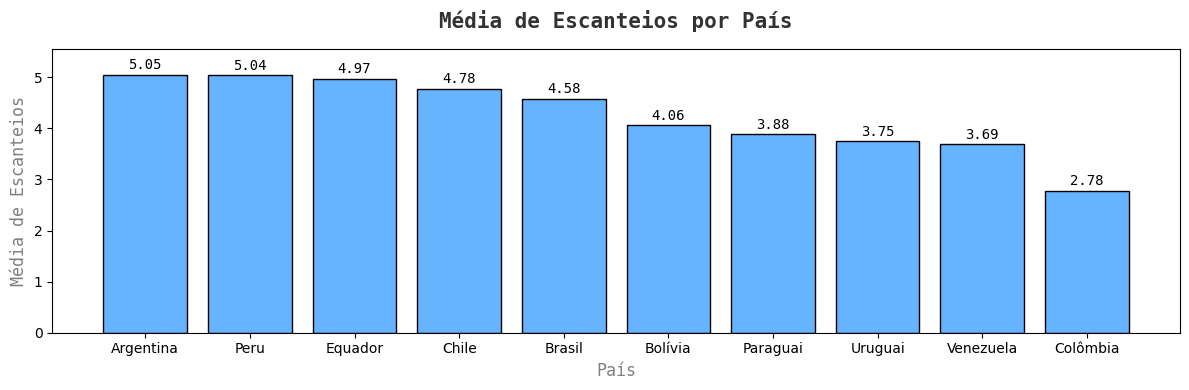

In [12]:
plot_avg_corners_by_country(df=df)

<div class="alert alert-block alert-info">
<b>Insight:</b> Times colombianos não tem muitos escanteios a favor. Argentinos, Peruanos, Equatorianos, Chilenos e Brasileiros possuem números bem parecidos, em média.</div>

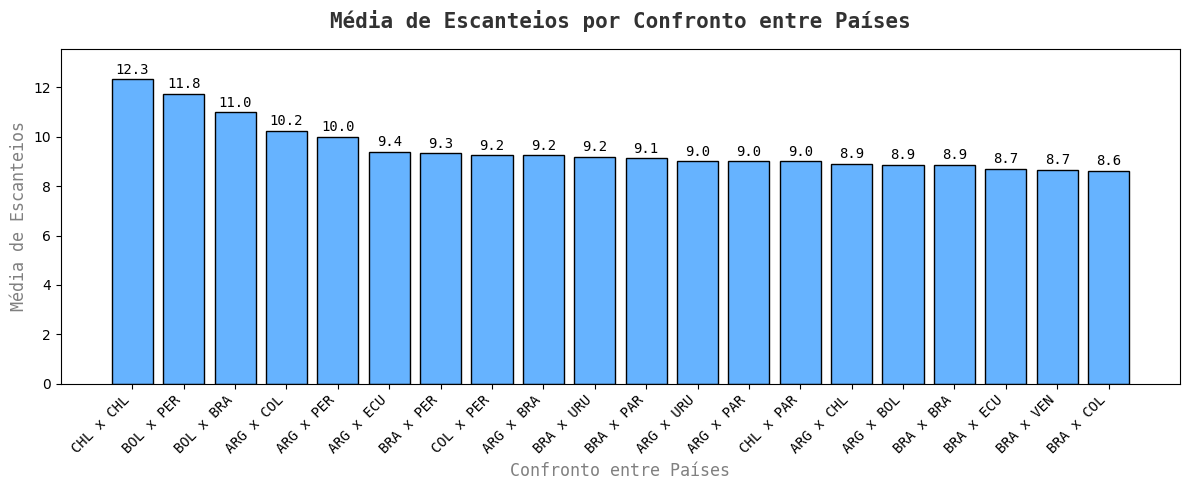

In [13]:
plot_avg_corners_by_matchup(df=df)

<div class="alert alert-block alert-info">
<b>Insight:</b> Jogos entre chilenos tem uma média bem alta de escanteios: 12,3. Confrontos que contém times brasileiros ou argentinos quase sempre aparecem com uma média alta</div>

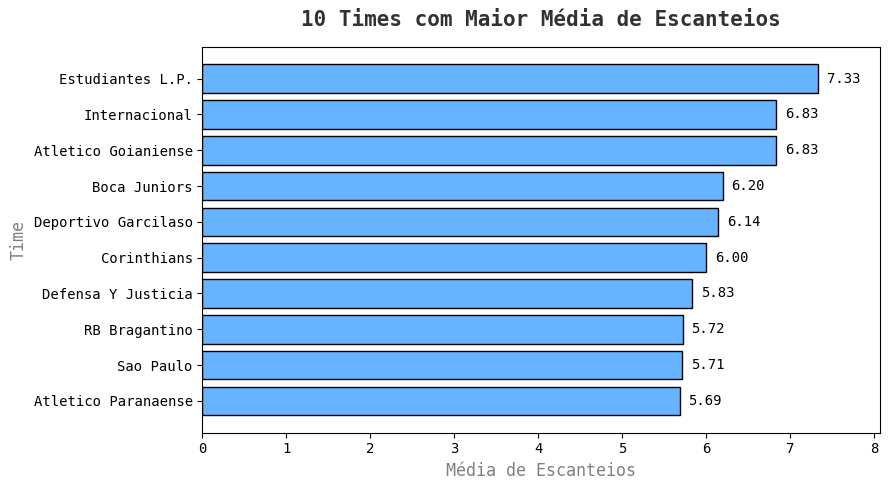

In [14]:
plot_avg_corners_by_team(df=df)

### Campeões

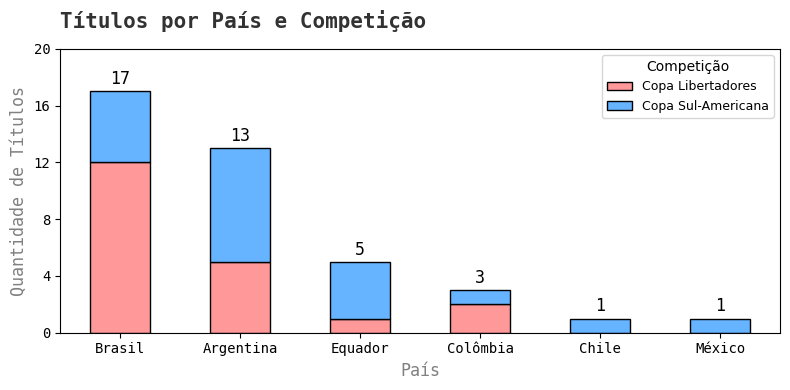

In [15]:
df_champions = create_champions_dataframe()
df_champions_by_country = calculate_champions_by_country(df=df_champions)

plot_champions_count_by_country(
    df=df_champions_by_country,
    title="Títulos por País e Competição",
)

<div class="alert alert-block alert-info">
<b>Insight:</b> Condiderando as últimas 20 edições da Libertadores e da Sulamericana, brasileiros e argentinos conquistaram 30 títulos dos 40 possíveis (75%). Destaque para as 12 conquistas brasileiras na Libertadores.</div>

### Estatísticas por Fase

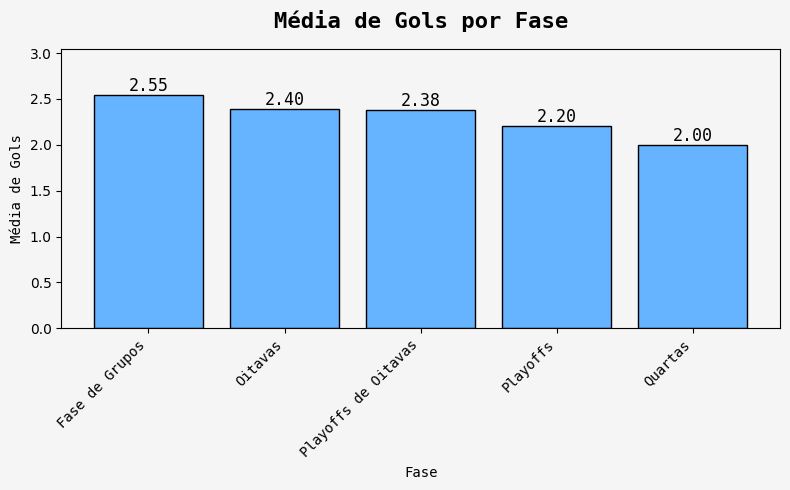

In [16]:
plot_avg_goals_per_round(df)

<div class="alert alert-block alert-info">
<b>Insight:</b> A diferença é pequena, mas em fases mais iniciais, geralmente, a média de gols é maior porque a diferença entre os times é maior (times fortes jogam contra times fracos, gerando mais oportunidades de gol).</div>

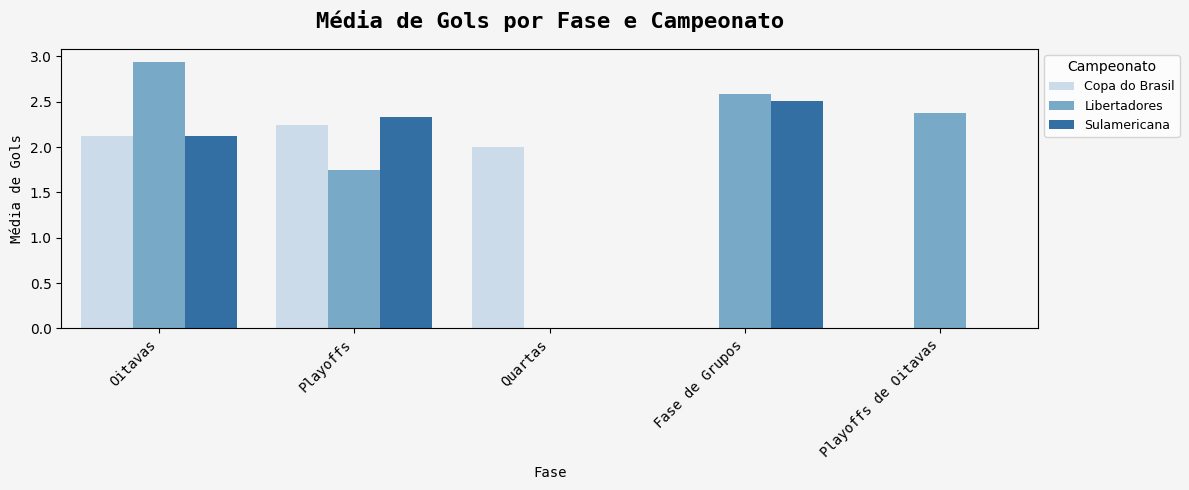

In [17]:
plot_avg_goals_per_round_and_league(df)

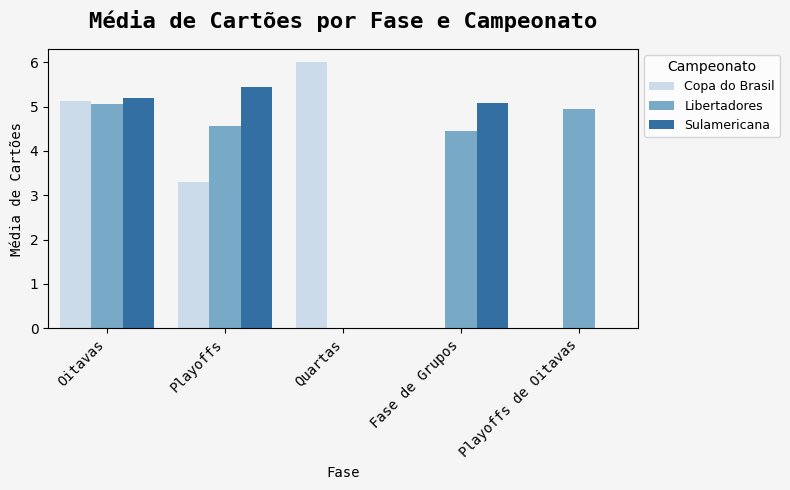

In [18]:
plot_avg_cards_per_round_and_league(df)

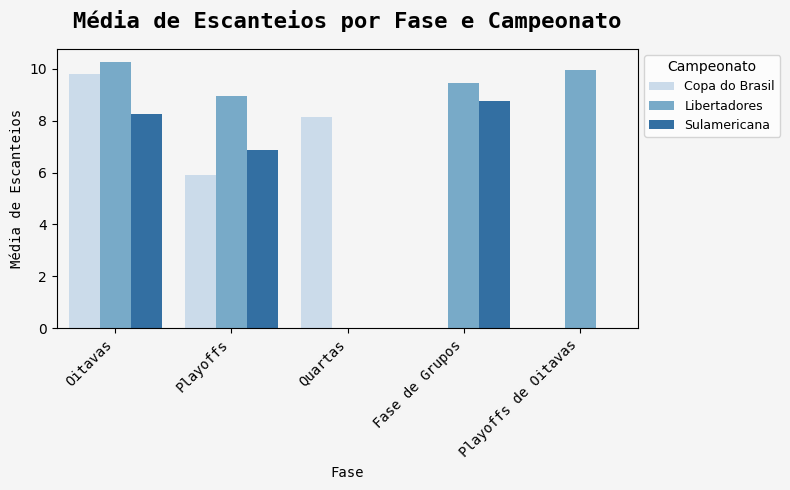

In [19]:
plot_avg_corners_per_round_and_league(df)

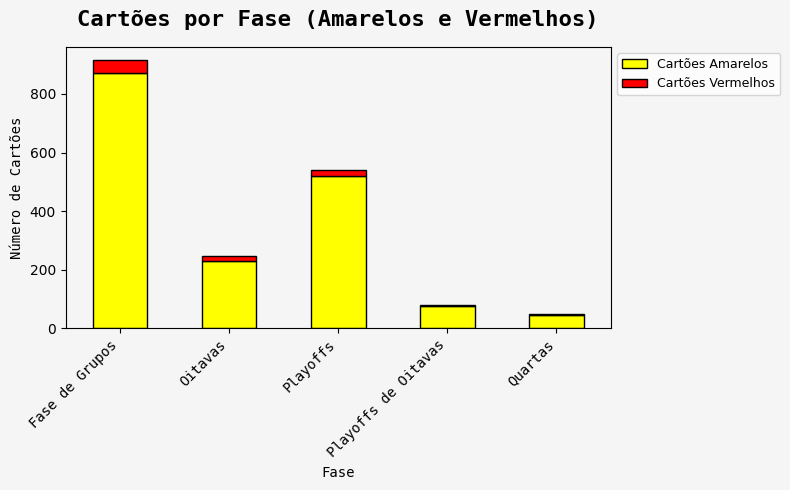

In [20]:
plot_cards_per_round(df)

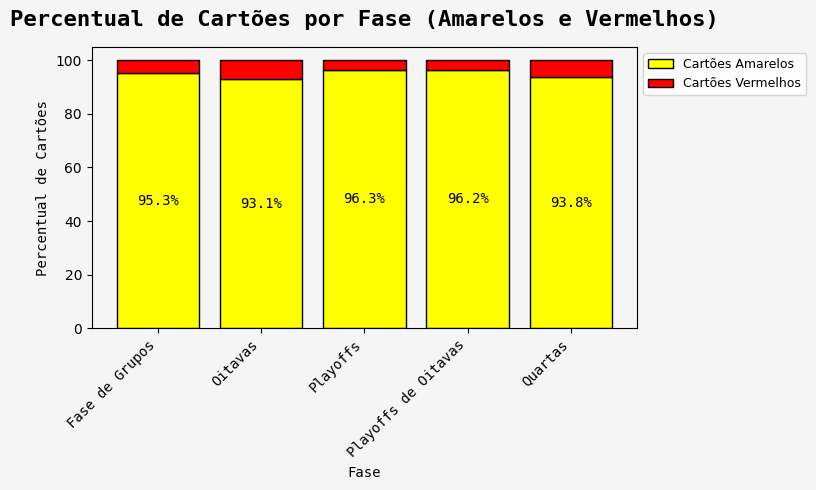

In [21]:
plot_card_percentages_per_round(df=df)

<div class="alert alert-block alert-info">
<b>Insight:</b> Considerando o total de cartões entregues em cada fase, o percentual de cartões vermelhos aumenta conforme a fase. Ou seja, quanto maior a fase, maior a probabilidade de um cartão vermelho por ser um jogo de mata mata e eliminatório.</div>